In [ ]:
import seaborn as sns
import pandas as pd

In [14]:
# DATASETS
ds_earnings = 'EAR_4MTH_SEX_OCU_CUR_NB_A-filtered-2025-12-03.csv'
ds_social_protection = 'SDG_0131_SEX_SOC_RT_A-20251203T2131.csv'

In [15]:
# LOAD DATASETS
df_earnings = pd.read_csv(ds_earnings)
df_social = pd.read_csv(ds_social_protection)

/tmp/ipykernel_1712782/2280607100.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_earnings = pd.read_csv(ds_earnings)


In [17]:
# FILTER DATA
year = 2022
skill_level = 'Total'
sex = 'Total'

df_earnings = df_earnings.query(f"`time`=={year} and `classif2.label`=='Currency: 2021 PPP $' and `classif1.label`=='Occupation (Skill level): {skill_level}' and `sex.label`=='{sex}'")
df_social = df_social.query(f'`sex.label`=="{sex}" and time=={year}')

In [18]:
# JOIN DATASETS ON REGION/COUNTRY
df = df_social.set_index('ref_area.label').join(df_earnings.set_index('ref_area.label'), how='inner', lsuffix='_social', rsuffix='_earnings')

In [25]:
factors = list(df_social['classif1.label'].unique())
print(factors)

['Contingency: Population covered by at least one social protection benefit', 'Contingency: Persons above retirement age receiving a pension', 'Contingency: Unemployed receiving unemployment benefits', 'Contingency: Children/households receiving child/family cash benefits', 'Contingency: Poor persons covered by social protection systems', 'Contingency: Vulnerable persons covered by social assistance', 'Contingency: Persons with severe disabilities collecting disability social protection benefits', 'Contingency: Employed covered in the event of work injury', 'Contingency: Mothers with newborns receiving maternity benefits']


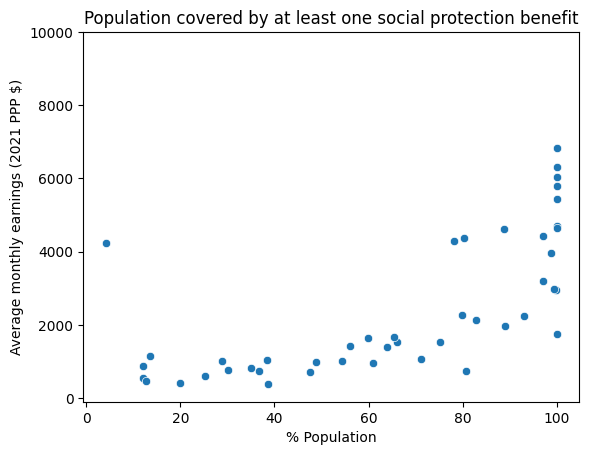

In [31]:
social_factor = 'Contingency: Population covered by at least one social protection benefit'
ax = sns.scatterplot(
    data = df.query(f"`classif1.label_social`=='{social_factor}'"),
    x = 'obs_value_social',
    y = 'obs_value_earnings',
)

ax.set(title=social_factor[13:], xlabel="% Population", ylabel="Average monthly earnings (2021 PPP $)", ylim=(-100, 10000));

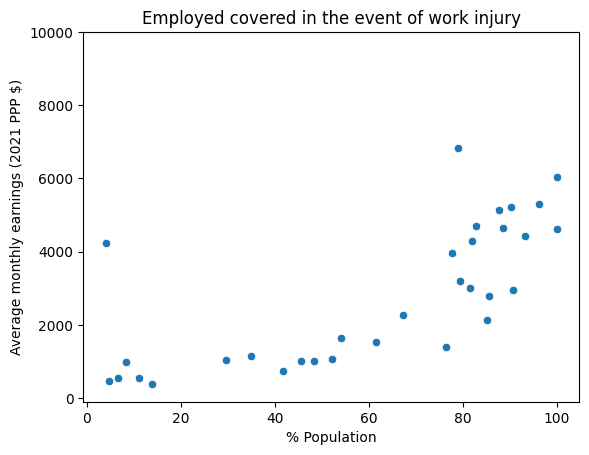

In [32]:
social_factor = 'Contingency: Employed covered in the event of work injury'
ax = sns.scatterplot(
    data = df.query(f"`classif1.label_social`=='{social_factor}'"),
    x = 'obs_value_social',
    y = 'obs_value_earnings',
)

ax.set(title=social_factor[13:], xlabel="% Population", ylabel="Average monthly earnings (2021 PPP $)", ylim=(-100, 10000));